# A retail store wants to identify customers who make frequent purchases. Given the dataset below, write a code to:
#     1. Group customers by their IDs.
#     2. Calculate the total number of purchases per customer.
#     3. Identify the top 3 frequent customers.
# Dataset:
# data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
#         'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}


In [70]:
import pandas as pd
import numpy as np
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
dataset=pd.DataFrame(data)
result = dataset.groupby('Customer_ID', as_index=False)['Purchase_Amount'].sum()
result = result.sort_values(by='Purchase_Amount', ascending=False)
top_3=result.head(3)
print("Total Purchases per Customer:\n",result)
print("Total Purchases per Customer:\n",top_3)

Total Purchases per Customer:
    Customer_ID  Purchase_Amount
1          102              600
0          101              520
2          103              480
4          105              400
3          104              300
Total Purchases per Customer:
    Customer_ID  Purchase_Amount
1          102              600
0          101              520
2          103              480


# Question 2:
# A company tracks the daily sales of a product over a month. You are tasked with identifying any abnormal sales data using the IQR (Interquartile Range) method.
# Dataset (Daily Sales in Units):

# data = {'Day': range(1, 31),
#         'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
#                   33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
#                   30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}

# Tasks:
# 1. Calculate the Q1 (25th percentile) and Q3 (75th percentile).
# 2. Determine the IQR.
# 3. Identify the Lower Bound and Upper Bound.
# 4. Detect and display the outliers.
# 5. Replace the Outliers with the Median Value.

In [97]:
import numpy as np
import pandas as pd
data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}
df =pd.DataFrame(data)
Q1=np.percentile(df['Sales'],25)
Q3=np.percentile(df['Sales'],75)
IQR=Q3-Q1
rule=1.5*IQR
Lesser=Q1-rule
Greater=Q3+rule
median_value = df['Sales'].median()
df['Sales'] = np.where((df['Sales'] < Lesser)|(df['Sales'] > Greater),median_value,df['Sales'])
print("Greater:",Greater,"\nLesser:",Lesser,"\nrule:",rule,"\nIQR:",IQR,"\nQ1:",Q1,"\nQ3:",Q3)
print(df)

Greater: 162.125 
Lesser: -46.875 
rule: 78.375 
IQR: 52.25 
Q1: 31.5 
Q3: 83.75
    Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0
5     6   60.0
6     7   22.0
7     8   80.0
8     9   95.0
9    10  120.0
10   11   33.0
11   12   29.0
12   13   27.0
13   14   35.0
14   15   40.0
15   16   50.0
16   17   85.0
17   18  110.0
18   19  105.0
19   20   92.0
20   21   30.0
21   22   34.0
22   23   31.0
23   24   33.0
24   25   36.0
25   26   42.0
26   27   44.0
27   28   48.0
28   29   90.0
29   30   43.0


# A pharmaceutical company is testing the effectiveness of a new drug to reduce blood pressure. Two groups of patients were selected:
# Group 1 (Treatment): Received the drug
# Group 2 (Control): Received a placebo
# The company wants to check if there is a significant difference in the blood pressure levels between the two groups using an Independent T-Test.
# Dataset:
# data = {'Group': ['Treatment']*10 + ['Control']*10,
#         'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
#                             130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
# Tasks:
#     1. Perform an Independent T-Test.
#     2. State the null and alternative hypotheses.
#     3. Calculate the p-value.
#     4. Conclude whether the drug has a significant effect.

In [111]:
import pandas as pd
from scipy.stats import ttest_ind
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
df=pd.DataFrame(data)
treatment = df[df['Group'] == 'Treatment']['Blood_Pressure']
control = df[df['Group'] == 'Control']['Blood_Pressure']
t_stat, p_value = ttest_ind(treatment, control)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print("Reject the Null Hypothesis: The drug has a significant effect.")

T-Statistic: -11.870553692962726
P-Value: 6.008066605173374e-10
Reject the Null Hypothesis: The drug has a significant effect.


<!-- A company tracks the delivery time (in minutes) for its online orders. You are given the delivery times for 50 orders.
    • Calculate the mean and standard deviation of the delivery times.
    • Plot the Probability Density Function (PDF) to visualize the distribution.
Dataset (Delivery Times in Minutes):
 
[25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160]
You can try implementing this using libraries like numpy, matplotlib, and scipy -->

# A company tracks the delivery time (in minutes) for its online orders. You are given the delivery times for 50 orders.
#     • Calculate the mean and standard deviation of the delivery times.
#     • Plot the Probability Density Function (PDF) to visualize the distribution.
# Dataset (Delivery Times in Minutes):
 
# [25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160]
# You can try implementing this using libraries like numpy, matplotlib, and scipy

Mean Delivery Time: 65.0625
Standard Deviation of Delivery Time: 41.718504212759115


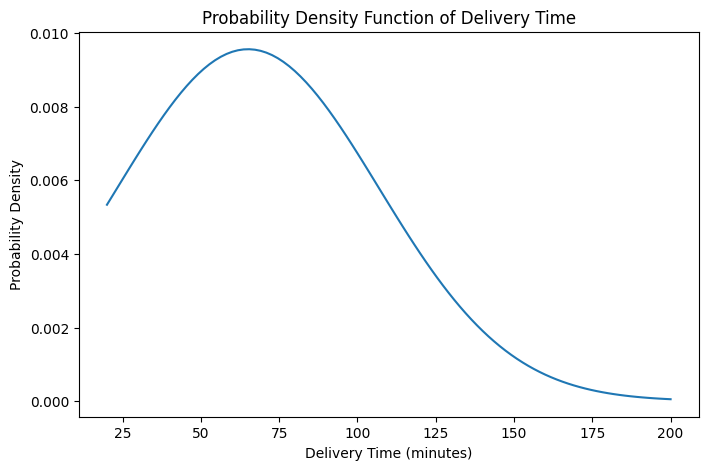

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
delivery_times=[25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160]
mean_time = np.mean(delivery_times)
std_time = np.std(delivery_times)
print("Mean Delivery Time:",mean_time)
print("Standard Deviation of Delivery Time:",std_time)
x = np.linspace(min(delivery_times), max(delivery_times), 100)
pdf = norm.pdf(x, mean_time, std_time)
plt.figure(figsize=(8,5))
plt.plot(x, pdf)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of Delivery Time")
plt.show()